In [1]:
import math
from datetime import datetime
import json
from pymongo import MongoClient
import dbQueries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from collections import Counter
sns.set()

In [2]:
plt.style.use('seaborn-notebook')


In [3]:
# Display results per genre
re_json = dbQueries.getTopGenres(10)
df_topGenres = pd.DataFrame.from_dict(re_json)
# ======= Columns added: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
df_topGenres.head()


,genres,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgProductionBudget,avgDomesticBudget,avgWorldwideGross,avgRevenue
0,Drama,81.121,1169,11.676,8.638,1574308.010,3.377920e+07,4.037743e+07,7.649464e+07,3911999.482
1,Documentary,110.208,1054,2.223,9.383,4910.930,2.550000e+07,3.190621e+07,6.845040e+07,22916.507
2,Comedy,67.746,760,17.191,8.658,2337151.226,3.714242e+07,4.488247e+07,8.158763e+07,4024125.428
3,Music,70.907,529,6.365,9.453,549995.849,5.050000e+07,3.263855e+07,6.939632e+07,1135669.070
4,Romance,88.394,325,13.211,8.599,830369.923,2.663846e+07,3.491543e+07,6.057785e+07,2699984.206


In [4]:
df_topGenres.shape

(10, 10)

In [5]:
df_topGenres.describe()

,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgProductionBudget,avgDomesticBudget,avgWorldwideGross,avgRevenue
count,10.000000,10.000000,10.000000,10.00000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,73.966000,525.400000,21.165000,8.69860,2.355983e+06,4.000419e+07,3.890693e+07,7.783373e+07,4.642771e+06
std,17.432723,347.370823,12.459941,0.41898,2.170878e+06,1.319696e+07,7.055758e+06,1.498427e+07,4.385676e+06
min,45.034000,237.000000,2.223000,8.11500,4.910930e+03,2.550000e+07,3.054113e+07,6.057785e+07,2.291651e+04
25%,64.212000,299.750000,12.059750,8.55925,9.190526e+05,3.036558e+07,3.320777e+07,6.868688e+07,2.243539e+06
50%,72.601500,321.000000,23.342000,8.62650,1.868793e+06,3.546081e+07,3.737013e+07,7.313044e+07,3.899978e+06
75%,80.117250,702.250000,30.569750,8.67075,2.509509e+06,4.879688e+07,4.375621e+07,8.147007e+07,4.491439e+06
max,110.208000,1169.000000,37.374000,9.45300,6.375323e+06,6.533333e+07,5.037111e+07,1.128220e+08,1.511300e+07


In [6]:
# Checking for null values
df_topGenres.isnull().sum()

genres                 0
avgRuntime             0
noMovies               0
avgPopularity          0
avgVotes               0
avgBudget              0
avgProductionBudget    0
avgDomesticBudget      0
avgWorldwideGross      0
avgRevenue             0
dtype: int64

In [7]:
# Checking for duplications
sum(df_topGenres.duplicated())
#df.drop_duplicates(inplace=True)


0

In [8]:
# avgBudget and avgRevenue
# Replace the value of '0' to NaN
df_topGenres[['avgBudget','avgRevenue']] = df_topGenres[['avgBudget','avgRevenue']].replace(0,np.NAN)
# ======== Do the same with new Columns added: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
df_topGenres.dropna(subset=['avgBudget', 'avgRevenue'], inplace=True)
print('After cleaning, we have {} rows'.format(df_topGenres.shape[0]))

After cleaning, we have 10 rows


In [9]:
# Profits of each movie
# ======== Do the same with new Columns added: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
df_topGenres['avgProfit'] = df_topGenres['avgRevenue']-df_topGenres['avgBudget']
df_topGenres['avgProfit'] = df_topGenres['avgProfit'].apply(np.int64)
df_topGenres['avgBudget'] = df_topGenres['avgBudget'].apply(np.int64)
df_topGenres['avgRevenue'] = df_topGenres['avgRevenue'].apply(np.int64)
df_topGenres['avgRuntime'] = df_topGenres['avgRuntime'].apply(np.int64)
df_topGenres['avgVotes'] = df_topGenres['avgVotes'].apply(np.int64)

df_topGenres.head()


,genres,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgProductionBudget,avgDomesticBudget,avgWorldwideGross,avgRevenue,avgProfit
0,Drama,81,1169,11.676,8,1574308,3.377920e+07,4.037743e+07,7.649464e+07,3911999,2337691
1,Documentary,110,1054,2.223,9,4910,2.550000e+07,3.190621e+07,6.845040e+07,22916,18005
2,Comedy,67,760,17.191,8,2337151,3.714242e+07,4.488247e+07,8.158763e+07,4024125,1686974
3,Music,70,529,6.365,9,549995,5.050000e+07,3.263855e+07,6.939632e+07,1135669,585673
4,Romance,88,325,13.211,8,830369,2.663846e+07,3.491543e+07,6.057785e+07,2699984,1869614


In [10]:
df_topGenres.dtypes

genres                  object
avgRuntime               int64
noMovies                 int64
avgPopularity          float64
avgVotes                 int64
avgBudget                int64
avgProductionBudget    float64
avgDomesticBudget      float64
avgWorldwideGross      float64
avgRevenue               int64
avgProfit                int64
dtype: object

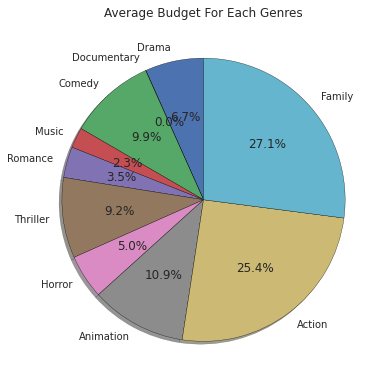

In [11]:
# ======== Plot new Columns added: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
slices = df_topGenres['avgBudget']
labels = df_topGenres['genres']

plt.pie(slices, labels = labels,shadow= True, startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})

plt.title('Average Budget For Each Genres')
plt.tight_layout()
plt.show()

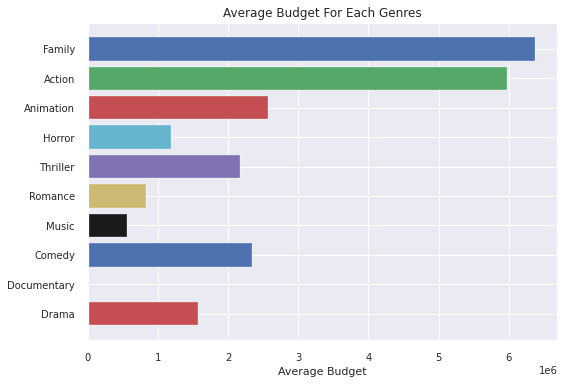

In [12]:
# ======== Columns available: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
my_colors = 'rgbkymc'
genres = df_topGenres['genres']
avgBudget = df_topGenres['avgBudget']
plt.barh(genres, avgBudget, color= my_colors)

plt.title("Average Budget For Each Genres")
plt.xlabel("Average Budget")    
plt.tight_layout()
plt.show()

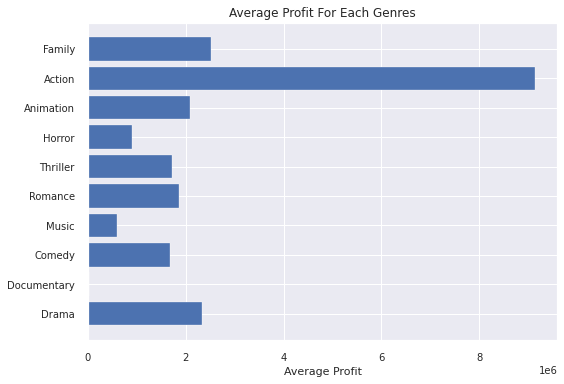

In [13]:
# ======== Columns available: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
genres = df_topGenres['genres']
avgProfit = df_topGenres['avgProfit']
plt.barh(genres, avgProfit)

plt.title("Average Profit For Each Genres")
plt.xlabel("Average Profit")    
plt.tight_layout()
plt.show()

In [14]:
# Display results per production companies
# ======== Columns available: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
re_json = dbQueries.getTopProductionCompanies(10)
df_topCompanies = pd.DataFrame.from_dict(re_json)
df_topCompanies.head(5)

,production_companies,noMovies,avgPopularity,avgVotesNo,avgBudget,avgProductionBudget,avgDomesticBudget,avgWorldwideGross,avgRevenue,avgVotes
0,Universal Pictures,25,52.762,1441.080,2.272000e+07,61400000.0,92396685.9,177364756.8,6.497059e+07,7.448
1,BBC,24,1.944,17.417,1.458333e+06,35000000.0,19389454.0,33422485.0,0.000000e+00,8.571
2,ARTE,22,3.155,70.273,8.540597e+05,12500000.0,4157491.0,45557491.0,1.820788e+06,8.795
3,Canal+,18,10.390,183.278,2.009167e+06,12500000.0,4157491.0,45557491.0,2.024542e+07,7.739
4,Walt Disney Pictures,15,164.935,1476.267,5.826667e+07,94000000.0,41070064.8,75273052.8,3.746845e+07,7.460


In [15]:
# ======== Columns available: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
df_topCompanies[['avgBudget','avgRevenue']] = df_topCompanies[['avgBudget','avgRevenue']].replace(0,np.NAN)

df_topCompanies.dropna(subset=['avgBudget', 'avgRevenue'], inplace=True)
print('After cleaning, we have {} rows'.format(df_topCompanies.shape[0]))


After cleaning, we have 6 rows


In [16]:
# Profits of each movie
df_topCompanies['avgProfit'] = df_topCompanies['avgRevenue']-df_topCompanies['avgBudget']
df_topCompanies['avgProfit'] = df_topCompanies['avgProfit'].apply(np.int64)
df_topCompanies['avgBudget'] = df_topCompanies['avgBudget'].apply(np.int64)
df_topCompanies['avgRevenue'] = df_topCompanies['avgRevenue'].apply(np.int64)
df_topCompanies['avgVotes'] = df_topCompanies['avgVotes'].apply(np.int64)

df_topGenres.head()

,genres,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgProductionBudget,avgDomesticBudget,avgWorldwideGross,avgRevenue,avgProfit
0,Drama,81,1169,11.676,8,1574308,3.377920e+07,4.037743e+07,7.649464e+07,3911999,2337691
1,Documentary,110,1054,2.223,9,4910,2.550000e+07,3.190621e+07,6.845040e+07,22916,18005
2,Comedy,67,760,17.191,8,2337151,3.714242e+07,4.488247e+07,8.158763e+07,4024125,1686974
3,Music,70,529,6.365,9,549995,5.050000e+07,3.263855e+07,6.939632e+07,1135669,585673
4,Romance,88,325,13.211,8,830369,2.663846e+07,3.491543e+07,6.057785e+07,2699984,1869614


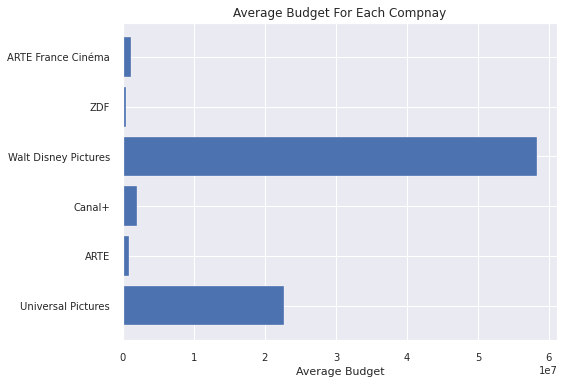

In [17]:
# ======== Columns available: avgProductionBudget, avgDomesticBudget, avgWorldwideGross ========
company = df_topCompanies['production_companies']
avgBudget = df_topCompanies['avgBudget']
plt.barh(company, avgBudget)           #Important changing

#plt.xscale('log')
plt.title("Average Budget For Each Compnay")
plt.xlabel("Average Budget")    
plt.tight_layout()
plt.show()

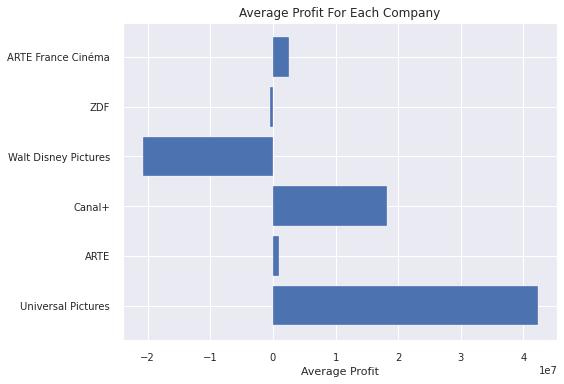

In [18]:
companies = df_topCompanies['production_companies']
avgProfit = df_topCompanies['avgProfit']
plt.barh(companies, avgProfit)

plt.title("Average Profit For Each Company")
plt.xlabel("Average Profit")    
plt.tight_layout()
plt.show()

In [19]:
# Display results per vote average
re_json = dbQueries.getTopVoteAvg(10)
df_topVoted = pd.DataFrame.from_dict(re_json)
df_topVoted.head(5)

,title,genres,budget,productionBudget,domesticBudget,worldwideGross,popularity,production_companies,production_countries,revenue,runtime,status,vote_avg,vote_count
0,Las Vegas,[],0,0,0,0,0.60,[],[United States of America],0,8.0,Released,10.0,1
1,Miss Saigon Manila,"[Music, War, Drama]",0,0,0,0,0.60,[],[Philippines],0,145.0,Released,10.0,1
2,The Ralph Stanley Story,[Documentary],0,0,0,0,0.60,[],[United States of America],0,82.0,Released,10.0,1
3,"Georg, bit for bit",[Documentary],0,0,0,0,0.60,[Laterna Magica],[Norway],0,55.0,Released,10.0,1
4,A Question of Faith,[],0,0,0,0,0.63,[],[],0,NaN,Released,10.0,1


In [20]:
# Display results per revenue
re_json = dbQueries.getTopMoreRevenue(10)
df_topMoreRevenue = pd.DataFrame.from_dict(re_json)
df_topMoreRevenue.head(5)

,title,genres,budget,productionBudget,domesticBudget,worldwideGross,popularity,production_companies,production_countries,revenue,runtime,status,vote_avg,vote_count
0,Scandalize My Name: Stories from the Blacklist,[],1000000,0,0,0,0.92,[],[],100000,54.0,Released,10.0,1
1,Las Vegas,[],0,0,0,0,0.60,[],[United States of America],0,8.0,Released,10.0,1
2,Miss Saigon Manila,"[Music, War, Drama]",0,0,0,0,0.60,[],[Philippines],0,145.0,Released,10.0,1
3,The Ralph Stanley Story,[Documentary],0,0,0,0,0.60,[],[United States of America],0,82.0,Released,10.0,1
4,"Georg, bit for bit",[Documentary],0,0,0,0,0.60,[Laterna Magica],[Norway],0,55.0,Released,10.0,1


# Analysis On Whole Data Set
## Fetching Data From MongoDB (Movies_collection)





In [21]:
re_json = dbQueries.wholeData()
wholeData = pd.DataFrame.from_dict(re_json)
wholeData.head(5)

,title,genres,budget,popularity,production_companies,production_countries,revenue,productionBudget,domesticBudget,worldwideGross,runtime,status,vote_avg,vote_count,release_date
0,Don’t Touch My Foot,"[Comedy, Action]",10,0.820,[Foot News],[United States of America],2,0.0,0.0,0.0,4.0,Released,10.0,1,2020-07-16
1,Commentary Tracks,"[Comedy, Drama]",0,0.600,[Sebs Sine Club],[Indonesia],0,0.0,0.0,0.0,16.0,Released,10.0,1,2020-08-01
2,Taylor & Barinov 2,"[Action, Comedy, Crime]",0,0.600,[],[United Kingdom],0,0.0,0.0,0.0,12.0,Released,10.0,1,2020-09-08
3,Get Lost,[Music],0,0.611,[SADPUNK],[],0,0.0,0.0,0.0,3.0,Released,10.0,1,2020-11-19
4,Capital Clark 4,"[Comedy, Drama]",0,1.422,[],[Canada],0,0.0,0.0,0.0,594.0,Released,10.0,1,2020-11-12


## Number of Rows and Columns Before Data Cleaning





In [22]:
wholeData.shape

(1000, 15)

In [23]:
wholeData.columns

Index(['title', 'genres', 'budget', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'productionBudget', 'domesticBudget',
       'worldwideGross', 'runtime', 'status', 'vote_avg', 'vote_count',
       'release_date'],
      dtype='object')

In [24]:
wholeData.isnull().sum()


title                   0
genres                  0
budget                  0
popularity              0
production_companies    0
production_countries    0
revenue                 0
productionBudget        0
domesticBudget          0
worldwideGross          0
runtime                 2
status                  0
vote_avg                0
vote_count              0
release_date            0
dtype: int64

# Data Cleaning:

In [25]:

# Changing Data Type of Release Date Into Datetime:

wholeData['release_date'] = pd.to_datetime(wholeData['release_date'])
wholeData['release_date'].head()

0   2020-07-16
1   2020-08-01
2   2020-09-08
3   2020-11-19
4   2020-11-12
Name: release_date, dtype: datetime64[ns]

In [26]:

# Budget and Revenue
# Replacing'0' by NaN

wholeData[['budget','revenue']] = wholeData[['budget','revenue']].replace(0,np.NAN)

wholeData.dropna(subset=['budget', 'revenue'], inplace=True)
print('After cleaning, we have {} rows'.format(wholeData.shape[0]))

After cleaning, we have 48 rows


In [27]:
# Data Imputation
# Profits of each movie

wholeData['profit'] = wholeData['revenue']-wholeData['budget']
wholeData['profit'] = wholeData['profit'].apply(np.int64)
wholeData['budget'] = wholeData['budget'].apply(np.int64)
wholeData['revenue'] = wholeData['revenue'].apply(np.int64)


# Data Analysis

In [28]:
wholeData.dtypes


title                           object
genres                          object
budget                           int64
popularity                     float64
production_companies            object
production_countries            object
revenue                          int64
productionBudget               float64
domesticBudget                 float64
worldwideGross                 float64
runtime                        float64
status                          object
vote_avg                       float64
vote_count                       int64
release_date            datetime64[ns]
profit                           int64
dtype: object

In [29]:
wholeData.describe()

,budget,popularity,revenue,productionBudget,domesticBudget,worldwideGross,runtime,vote_avg,vote_count,profit
count,4.800000e+01,48.000000,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,48.000000,48.000000,48.000000,4.800000e+01
mean,3.118627e+07,99.643021,3.438349e+07,1.806667e+07,1.023520e+07,2.362563e+07,76.562500,7.812500,957.916667,3.197220e+06
std,5.225447e+07,233.649423,6.232305e+07,4.253430e+07,2.285393e+07,5.097014e+07,42.490503,1.552023,1427.105489,5.164216e+07
min,1.000000e+00,0.600000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,5.300000,1.000000,-1.430000e+08
25%,3.875000e+03,0.895000,7.822500e+02,0.000000e+00,0.000000e+00,0.000000e+00,39.250000,6.400000,1.000000,-6.070944e+06
50%,9.500000e+06,31.952500,7.485823e+06,0.000000e+00,0.000000e+00,0.000000e+00,94.500000,7.500000,395.500000,-4.000000e+00
75%,3.075000e+07,66.262250,4.348365e+07,1.275000e+07,1.291959e+07,2.318989e+07,102.250000,9.625000,1417.000000,6.603725e+06
max,2.000000e+08,1503.639000,3.067665e+08,2.000000e+08,1.103594e+08,2.511247e+08,133.000000,10.000000,6476.000000,2.217665e+08


In [30]:
 # Select the lowest and hisghest value from a given column 

def find_min_max(col_name):
    min_index = wholeData[col_name].idxmin()
    max_index = wholeData[col_name].idxmax()
    low  = pd.DataFrame(wholeData.loc[min_index,:])
    high = pd.DataFrame(wholeData.loc[max_index,:])    
    print('Movie which has highest '+col_name+' : ', wholeData['title'][max_index])
    print('Movie which has lowest '+col_name+' : ', wholeData['title'][min_index])
    return pd.concat([high,low], axis=1)

In [31]:
# Finding the top 10 from a given column 

def top_10(col_name,size=10):
    df_sorted = pd.DataFrame(wholeData[col_name].sort_values(ascending=False))[:size]
    df_sorted['title'] = wholeData['title']
    plt.figure(figsize=(12,6))
    #Calculate the avarage
    avg = np.mean(wholeData[col_name])   
    sns.barplot(x=col_name, y='title', data=df_sorted, label=col_name)
    plt.axvline(avg, color='k', linestyle='--', label='mean')
    if (col_name == 'profit' or col_name == 'budget' or col_name == 'revenue'):
        plt.xlabel(col_name.capitalize() + ' (U.S Dolar)')
    else:
        plt.xlabel(col_name.capitalize())
    plt.ylabel('')
    plt.title('Top 10 Movies in: ' + col_name.capitalize())
    plt.legend()


In [32]:
find_min_max('profit')


Movie which has highest profit :  Sonic the Hedgehog
Movie which has lowest profit :  Mulan


,64,17
title,Sonic the Hedgehog,Mulan
genres,"[Action, Science Fiction, Comedy, Family]","[Adventure, Fantasy]"
budget,85000000,200000000
popularity,125.925,332.695
production_companies,"[Original Film, Blur Studios, Marza Animation ...","[Walt Disney Pictures, China Film Group Corpor..."
production_countries,"[Japan, United States of America]","[China, United States of America]"
revenue,306766470,57000000
productionBudget,0.0,200000000.0
domesticBudget,0.0,0.0
worldwideGross,0.0,69963008.0


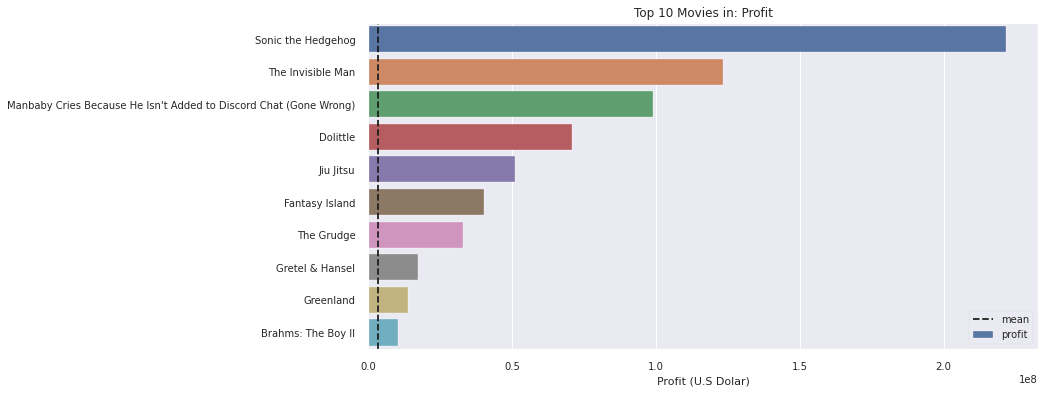

In [33]:
top_10('profit')


In [34]:
find_min_max('budget')


Movie which has highest budget :  Mulan
Movie which has lowest budget :  Manbaby Cries Because He Isn't Added to Discord Chat (Gone Wrong)


,17,381
title,Mulan,Manbaby Cries Because He Isn't Added to Discor...
genres,"[Adventure, Fantasy]",[War]
budget,200000000,1
popularity,332.695,0.6
production_companies,"[Walt Disney Pictures, China Film Group Corpor...",[Alwharf Studios]
production_countries,"[China, United States of America]",[]
revenue,57000000,99000000
productionBudget,200000000.0,0.0
domesticBudget,0.0,0.0
worldwideGross,69963008.0,0.0


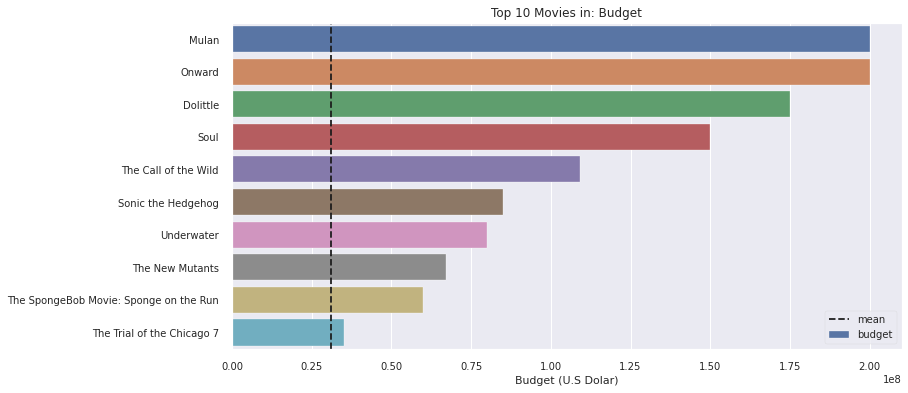

In [35]:
top_10('budget')


In [36]:
find_min_max('revenue')


Movie which has highest revenue :  Sonic the Hedgehog
Movie which has lowest revenue :  Rocky Horror Remade


,64,407
title,Sonic the Hedgehog,Rocky Horror Remade
genres,"[Action, Science Fiction, Comedy, Family]","[Horror, Animation, Music, Comedy, Science Fic..."
budget,85000000,1
popularity,125.925,1.96
production_companies,"[Original Film, Blur Studios, Marza Animation ...",[The Player's Society]
production_countries,"[Japan, United States of America]",[United States of America]
revenue,306766470,1
productionBudget,0.0,0.0
domesticBudget,0.0,0.0
worldwideGross,0.0,0.0


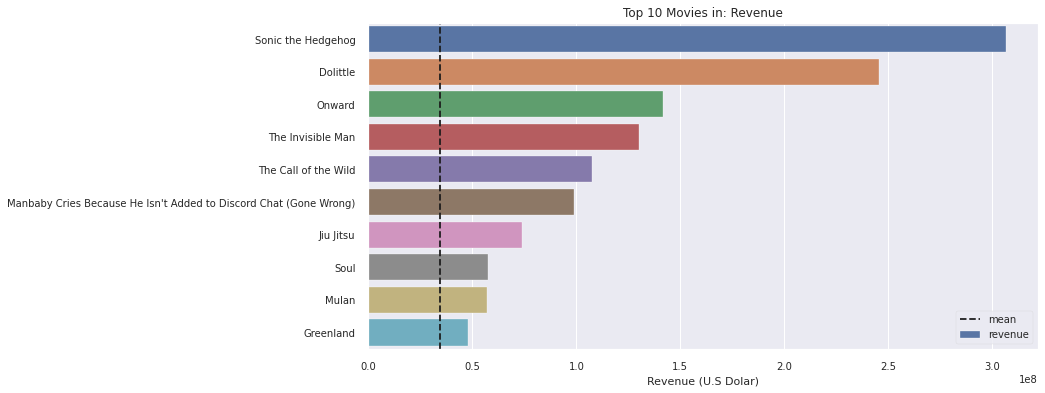

In [37]:
top_10('revenue')


In [38]:
find_min_max('runtime')


Movie which has highest runtime :  Mank
Movie which has lowest runtime :  ALL COPS AIN'T BAD


,218,650
title,Mank,ALL COPS AIN'T BAD
genres,"[Drama, History]",[Comedy]
budget,20000000,100000
popularity,31.695,0.721
production_companies,[Netflix International Pictures],[VH2 Networks]
production_countries,[United States of America],[United States of America]
revenue,100000,350000
productionBudget,0.0,0.0
domesticBudget,0.0,0.0
worldwideGross,0.0,0.0


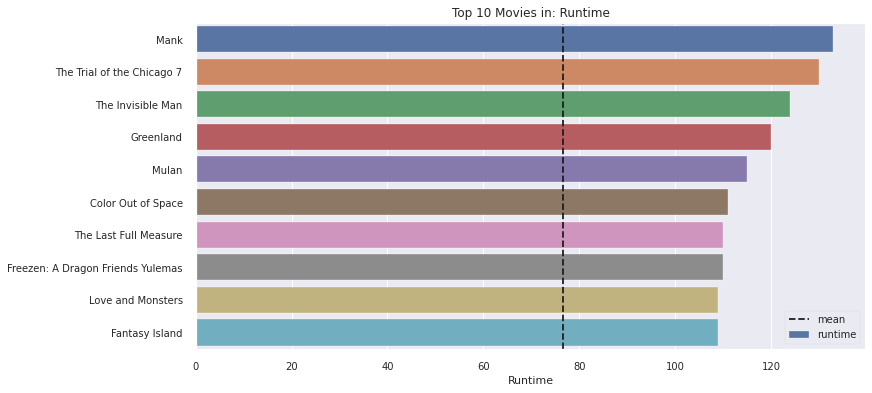

In [39]:
top_10('runtime')


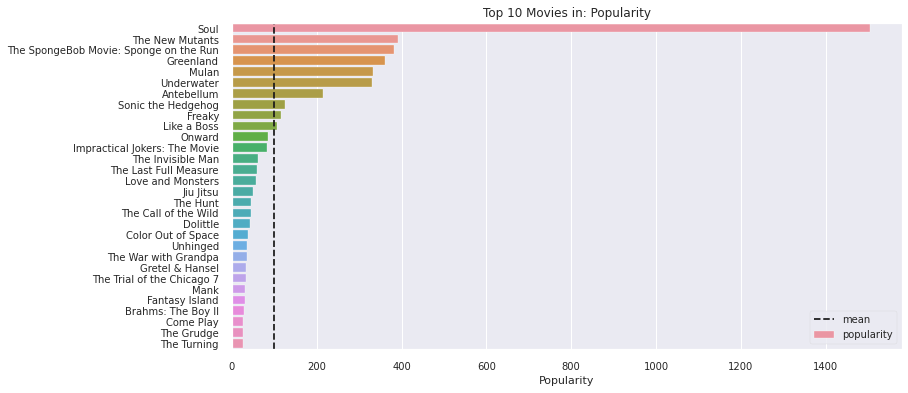

In [40]:
top_10('popularity', size=30)


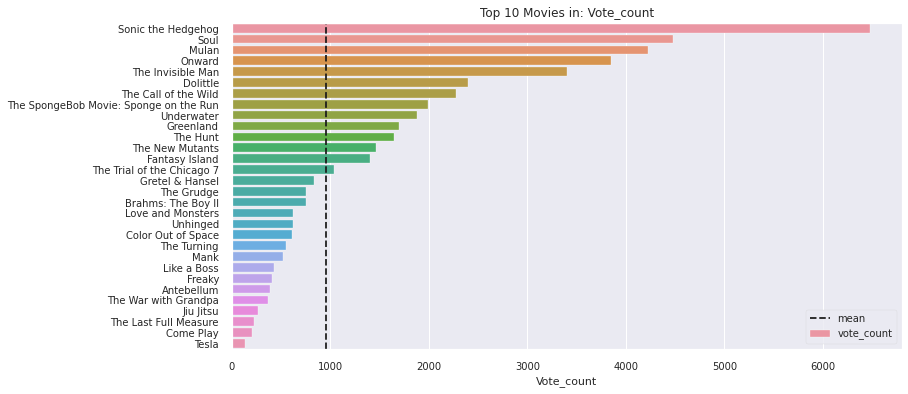

In [41]:
top_10('vote_count', size=30)


Text(0.5, 1.0, 'Total profit by month')

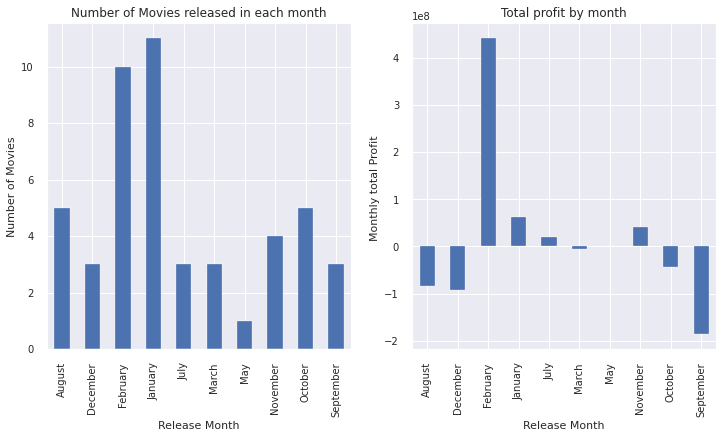

In [42]:
df_month = wholeData.copy()
df_month['release_month'] = df_month['release_date'].dt.strftime("%B")

fig = plt.figure(figsize=(12,6))
count_month = df_month.groupby('release_month')['profit'].count()
plt.subplot(1,2,1)
count_month.plot.bar()
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.title('Number of Movies released in each month')

plt.subplot(1,2,2)
sum_month = df_month.groupby('release_month')['profit'].sum()

sum_month.plot.bar()
plt.xlabel('Release Month')
plt.ylabel('Monthly total Profit ')
plt.title('Total profit by month')


In [43]:
df_related = wholeData[['profit','budget','revenue','runtime', 'vote_count','popularity']]


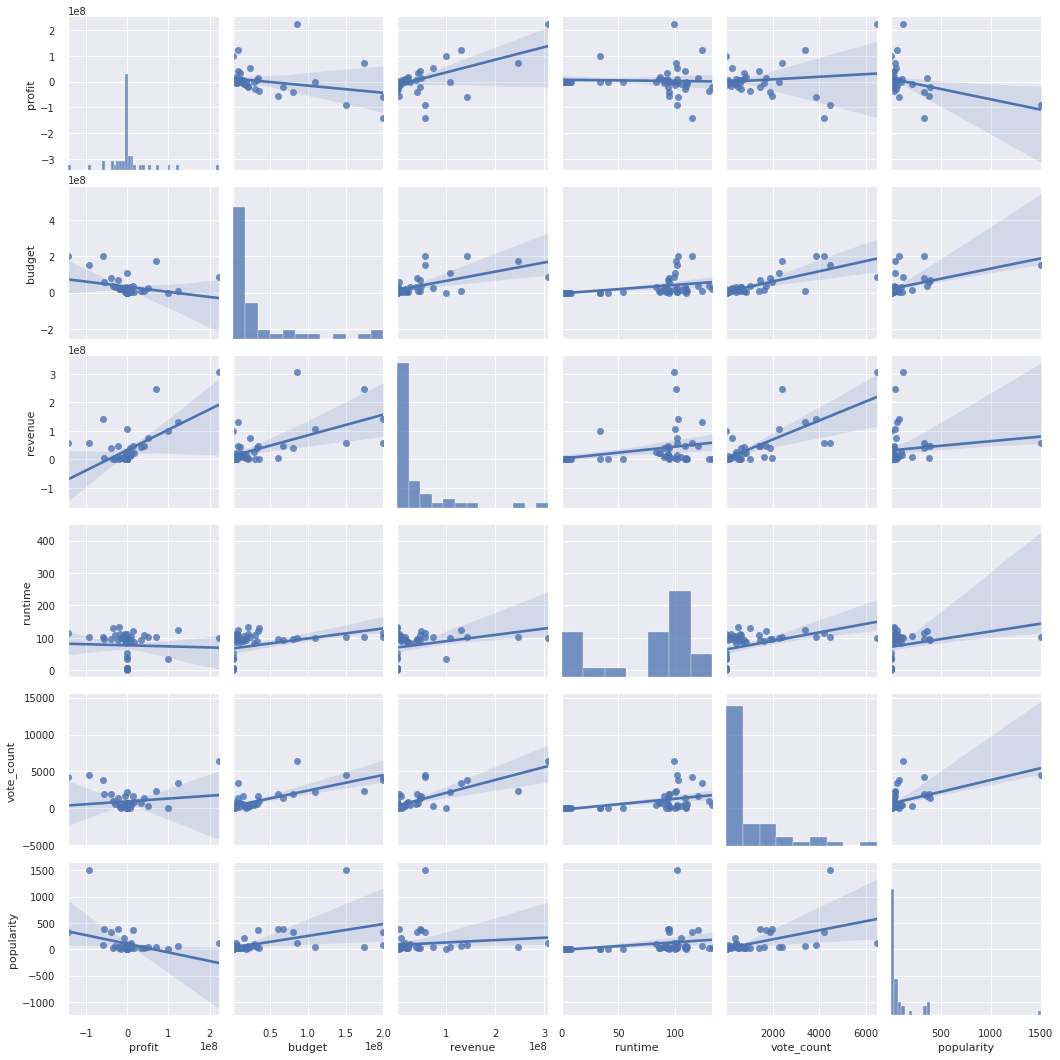

In [44]:
sns.pairplot(df_related, kind='reg')
#plt.savefig('correlation.png',bbox_inches='tight')



<AxesSubplot:xlabel='revenue', ylabel='budget'>

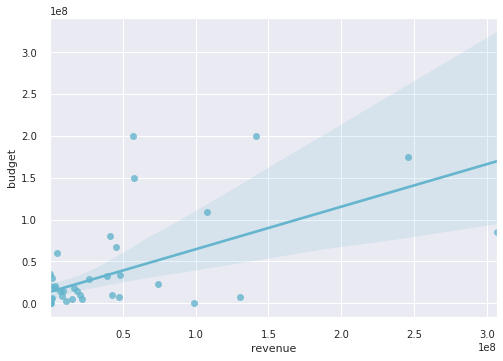

In [45]:
sns.regplot(x=wholeData['revenue'], y=wholeData['budget'],color='c')


In [46]:

def plot_correlation_map( wholeData ):
    corr = wholeData.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, 
                    annot = True, annot_kws = { 'fontsize' : 12 })

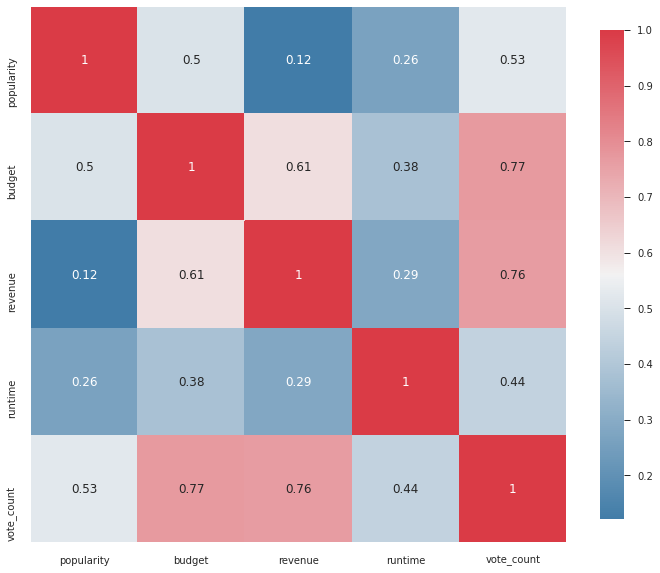

In [47]:
plot_correlation_map(wholeData[['popularity','budget','revenue','runtime','vote_count']])


In [48]:
def split_count_data(col_name, size=15):
    ##function which will take any column as argument from which data is need to be extracted and keep track of count
    #take a given column, and separate the string by '|'
    wholeData[col_name] = wholeData[col_name].map(str).map(str.strip)
    data = wholeData[col_name].str.cat(sep='|')
    #storing the values separately in the series
    data = pd.Series(data.split('|'))
    #Let's count the most frequenties values for given column
    count = data.value_counts(ascending=False)
    count_size = count.head(size)
    #Setting axis name for multiple names
    if (col_name == 'production_companies'):
        sp = col_name.split('_')
        axis_name = sp[0].capitalize()+' '+ sp[1].capitalize()
    else:
        axis_name = col_name.capitalize()
    fig = plt.figure(figsize=(14, 6))
    #set the subplot 
    gs = gridspec.GridSpec(1,2, width_ratios=[2,2])
    #count of given column on the bar plot
    ax0 = plt.subplot(gs[0])
    count_size.plot.barh()
    plt.xlabel('Number of Movies')
    plt.ylabel(axis_name)
    plt.title('The Most '+str(size)+' Filmed ' +axis_name+' Versus Number of Movies')
    ax = plt.subplot(gs[1])
    #setting the explode to adjust the pei chart explode variable to any given size
    explode = []
    total = 0
    for i in range(size):
         total = total + 0.015
         explode.append(total)
    #pie chart for given size and given column
    ax = count_size.plot.pie(autopct='%1.2f%%', shadow=True, startangle=0, pctdistance=0.9, explode=explode)
    plt.title('The most '+str(size)+' Filmed ' +axis_name+ ' in Pie Chart')
    plt.xlabel('')
    plt.ylabel('')
    plt.axis('equal')
    plt.legend(loc=9, bbox_to_anchor=(1.4, 1))


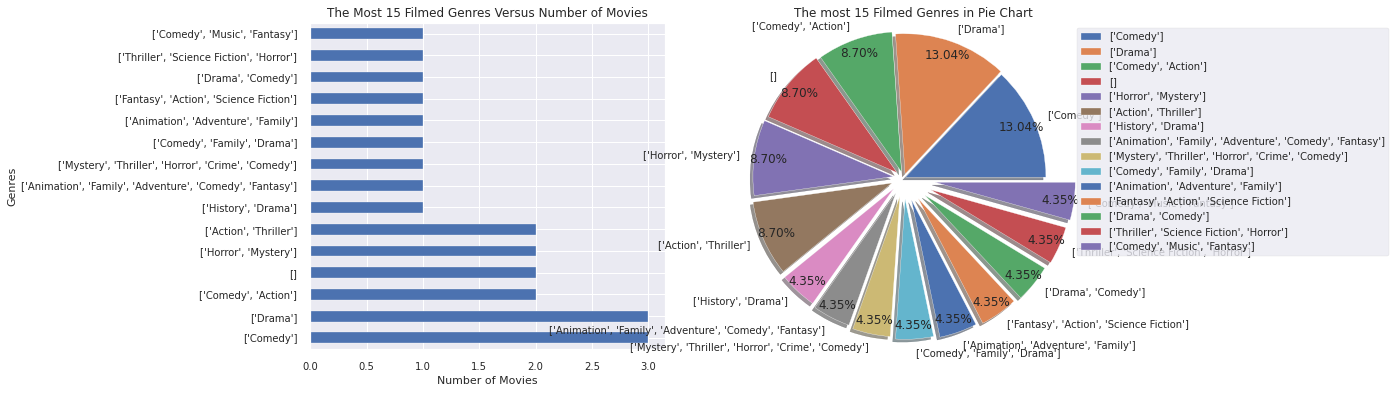

In [49]:
split_count_data('genres')
